In [1]:

# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

In [2]:
#Loading dotenv to access ALPACA key and secret key

load_dotenv(dotenv_path='C:/Users/panka/Documents/June18th/.env.txt')

# Setting the Alpaca API key and ALPACA secret key variables to use ALPACA data
alpaca_api_key = os.getenv("ALPACA_KEY_ID")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [3]:

#Displaying ALPACA Key
alpaca_api_key

'PKLKGDHI5PYRI89FRKQ5'

In [4]:

#Displaying ALPACA Secret Key
alpaca_secret_key

'8BEwcV1DrSAX9wxWswvvMUo388uPCPow8b6B5zSL'

In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [6]:
# Format  date as ISO format
start_date = pd.Timestamp("2017-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()

In [7]:
# Set the tickers
tickers = ['AAPL', 'AAL', 'AMZN', 'JPM', 'F', 'TWTR', 'META', 'NVDA', 'BAC', 'NOW']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,47.28,47.340,46.135,46.30,6744633,50163,46.542610,AAL
2017-01-04 05:00:00+00:00,46.39,47.435,46.350,46.70,5859604,36908,46.828719,AAL
2017-01-05 05:00:00+00:00,46.52,46.930,45.610,45.89,6925316,38478,46.173073,AAL
2017-01-06 05:00:00+00:00,45.85,46.720,45.470,46.21,7260197,43811,46.203536,AAL
2017-01-09 05:00:00+00:00,46.01,47.340,45.780,47.08,4739142,29086,46.905543,AAL
...,...,...,...,...,...,...,...,...
2021-12-27 05:00:00+00:00,44.21,44.920,44.130,44.33,8594926,74327,44.469436,TWTR
2021-12-28 05:00:00+00:00,44.21,44.780,43.230,43.43,8831036,76997,43.776774,TWTR
2021-12-29 05:00:00+00:00,43.17,43.550,42.560,42.76,8719359,72681,42.824685,TWTR


In [9]:
# Reorganizing the DataFrame df_portfolio

# Separate ticker data
aapl = df_portfolio[df_portfolio['symbol']=='AAPL'].drop('symbol', axis=1)
aal = df_portfolio[df_portfolio['symbol']=='AAL'].drop('symbol', axis=1)
amzn = df_portfolio[df_portfolio['symbol']=='AMZN'].drop('symbol', axis=1)
jpm = df_portfolio[df_portfolio['symbol']=='JPM'].drop('symbol', axis=1)
f = df_portfolio[df_portfolio['symbol']=='F'].drop('symbol', axis=1)
twtr = df_portfolio[df_portfolio['symbol']=='TWTR'].drop('symbol', axis=1)
meta = df_portfolio[df_portfolio['symbol']=='META'].drop('symbol', axis=1)
nvda = df_portfolio[df_portfolio['symbol']=='NVDA'].drop('symbol', axis=1)
bac = df_portfolio[df_portfolio['symbol']=='BAC'].drop('symbol', axis=1)
now = df_portfolio[df_portfolio['symbol']=='NOW'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([aapl,aal,amzn,jpm,f,twtr,meta,nvda,bac,now],axis=1, keys=['AAPL','AAL','AMZN','JPM','F','TWTR','META','NVDA','BAC','NOW'])

# Display sample data of concatenated Dataframe
df_portfolio

AAPL                                      \
                             open      high     low   close    volume   
timestamp                                                               
2017-01-03 05:00:00+00:00  115.80  116.3300  114.76  116.15  28858812   
2017-01-04 05:00:00+00:00  115.95  116.5100  115.75  116.02  21128357   
2017-01-05 05:00:00+00:00  115.90  116.8642  115.81  116.61  22193737   
2017-01-06 05:00:00+00:00  116.78  118.1600  116.47  117.91  31762830   
2017-01-09 05:00:00+00:00  117.94  119.4300  117.94  118.99  33561948   
...                           ...       ...     ...     ...       ...   
2021-12-27 05:00:00+00:00  177.10  180.4200  177.07  180.33  74912939   
2021-12-28 05:00:00+00:00  180.20  181.3300  178.53  179.29  79103863   
2021-12-29 05:00:00+00:00  179.30  180.6300  178.14  179.38  62325973   
2021-12-30 05:00:00+00:00  179.59  180.5700  178.09  178.20  59770632   
2021-12-31 05:00:00+00:00  178.00  179.2300  177.26  177.57  64038680   

                                                     AAL                  ...  \
                          trade_count        vwap   open    high     low  ...   
timestamp                                                                 ...   
2017-01-03 05:00:00+00:00      158513  115.614123  47.28  47.340  46.135  ...   
2017-01-04 05:00:00+00:00      129950  116.131882  46.39  47.435  46.350  ...   
2017-01-05 05:00:00+00:00      136222  116.461108  46.52  46.930  45.610  ...   
2017-01-06 05:00:00+00:00      177885  117.733473  45.85  46.720  45.470  ...   
2017-01-09 05:00:00+00:00      184629  118.979875  46.01  47.340  45.780  ...   
...                               ...         ...    ...     ...     ...  ...   
2021-12-27 05:00:00+00:00      629431  179.056944  17.65  18.240  17.545  ...   
2021-12-28 05:00:00+00:00      631316  179.707003  18.03  18.640  17.920  ...   
2021-12-29 05:00:00+00:00      491576  179.455692  18.41  18.430  17.990  ...   
2021-12-30 05:00:00+00:00      498613  179.374495  17.99  18.380  17.960  ...   
2021-12-31 05:00:00+00:00      451478  177.800285  18.07  18.360  17.930  ...   

                                BAC                            NOW           \
                             volume trade_count       vwap    open     high   
timestamp                                                                     
2017-01-03 05:00:00+00:00  99432202      168272  22.451823   75.31   76.990   
2017-01-04 05:00:00+00:00  76875118      126682  22.797969   76.09   78.980   
2017-01-05 05:00:00+00:00  86826747      160834  22.631306   78.71   79.670   
2017-01-06 05:00:00+00:00  66281576      115777  22.737745   79.24   82.390   
2017-01-09 05:00:00+00:00  76179609      126405  22.556692   81.80   82.570   
...                             ...         ...        ...     ...      ...   
2021-12-27 05:00:00+00:00  33856913      126968  44.617240  655.98  664.945   
2021-12-28 05:00:00+00:00  32456207      110897  44.766075  667.64  667.640   
2021-12-29 05:00:00+00:00  27930601      102909  44.726689  655.18  658.860   
2021-12-30 05:00:00+00:00  23850240      104455  44.669550  656.20  663.170   
2021-12-31 05:00:00+00:00  24225342      101848  44.483708  652.02  658.590   

                                                                             
                               low   close   volume trade_count        vwap  
timestamp                                                                    
2017-01-03 05:00:00+00:00   74.630   75.66  1101812       10671   75.365543  
2017-01-04 05:00:00+00:00   75.890   78.83  2015348       16904   78.235291  
2017-01-05 05:00:00+00:00   78.340   79.13  1564020       13022   79.167377  
2017-01-06 05:00:00+00:00   78.900   82.10  1686580       14048   81.480332  
2017-01-09 05:00:00+00:00   81.300   82.00  1339252       11310   81.967060  
...                            ...     ...      ...         ...         ...  
2021-12-27 05:00:00+00:00  651.970  663.28   681023       2655

In [11]:
#Import MCSimulation
from MCForecastTools import MCSimulation

In [12]:
# Set number of simulations to 500 and equal weights to all stocks 
num_sims = 500
weights = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
mc_portfolio = MCSimulation(
    portfolio_data = df_portfolio,
    weights = weights,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [13]:
# Run Monte Carlo simulations to forecast 30 years cumulative returns
mc_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 110.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 120.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 130.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 140.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 150.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 160.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 170.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 180.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 190.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 200.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 210.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 220.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 230.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 240.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 250.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 260.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 270.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 280.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 290.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 300.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 310.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 320.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 330.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 340.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 350.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 360.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 370.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 380.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 390.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 400.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 410.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 420.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 430.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 440.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 450.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 460.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 470.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 480.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

Running Monte Carlo simulation number 490.


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\panka\Untitled Folder 2\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perf

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992618,0.989617,1.016652,0.982685,1.004461,0.983294,1.020995,0.998487,0.996590,0.996711,...,1.001230,1.004147,1.010337,0.994693,1.003200,0.987435,1.000318,1.015038,1.009606,0.994910
2,0.976480,0.991442,1.012361,0.983831,1.004933,1.001051,1.026847,0.997186,0.996372,0.987495,...,1.003883,1.006096,0.991073,1.001859,1.008286,0.996788,1.008906,1.011991,1.002969,0.985106
3,0.982299,0.982113,1.018001,0.981896,1.005858,1.002790,1.018302,1.016063,0.993588,0.993383,...,0.990528,1.006284,0.984553,1.000934,1.018202,0.988495,1.005423,1.027171,0.993830,0.988142
4,0.988531,0.988259,1.025696,0.985748,1.005208,1.001396,1.017400,1.023049,0.994349,1.002139,...,0.987974,0.997235,0.985021,1.014480,1.014592,1.006183,1.004307,1.042150,0.994743,0.994648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5396.682873,983.151686,2244.304946,233.302692,2741.702112,4578.873051,360.192190,3995.036768,1219.778802,1601.501908,...,912.651762,582.597832,3316.259471,800.115683,633.146266,468.455677,1429.573474,3428.921223,687.966881,1155.682037
7557,5446.644605,979.885198,2245.342248,232.307742,2752.622998,4551.067810,364.834210,4056.184065,1214.693257,1602.295723,...,900.153738,573.192297,3327.917044,801.228809,646.727849,476.309799,1424.224265,3384.267397,675.717243,1138.555267
7558,5433.519557,978.434385,2204.450568,233.708210,2781.091197,4558.619477,367.317307,4092.273909,1209.255538,1598.850257,...,905.777573,579.455944,3351.385048,802.312668,642.385344,475.039574,1409.799577,3385.031546,667.813264,1138.205272
7559,5396.569571,982.372447,2181.944035,233.858639,2798.183564,4536.884388,368.002695,4080.365795,1207.466367,1586.784179,...,918.678851,575.368431,3337.168434,801.538439,644.660899,479.428248,1424.718821,3346.094305,664.488383,1146.029767


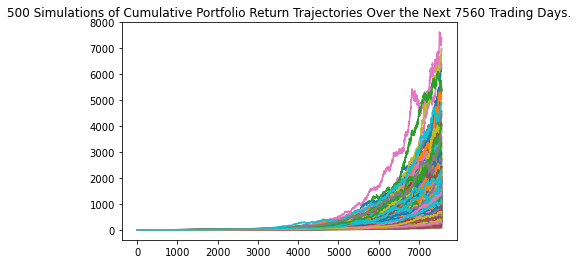

In [14]:

# Plot simulation outcomes
sim_plot = mc_portfolio.plot_simulation()

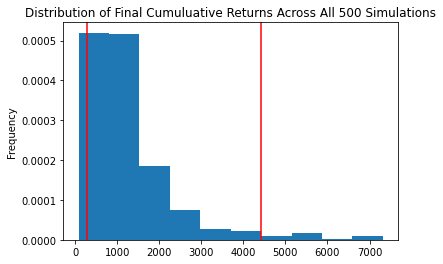

In [15]:
# Plot probability distribution and confidence intervals
dist_plot = mc_portfolio.plot_distribution()

In [16]:
# Retirement Analysis

# summary statistics for the Monte Carlo simulation
portfolio_summary = mc_portfolio.summarize_cumulative_return()

# Print summary statistics
print(portfolio_summary)

count            500.000000
mean            1291.521149
std             1052.278070
min               82.320863
25%              642.955843
50%              994.001707
75%             1528.467163
max             7317.860150
95% CI Lower     287.020456
95% CI Upper    4423.911534
Name: 7560, dtype: float64


C:\Users\panka\Untitled Folder 2\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [17]:
# Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
portfolio_ci_lower = round(portfolio_summary[8]*20000,2)
portfolio_ci_upper = round(portfolio_summary[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${portfolio_ci_lower} and ${portfolio_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $5740409.11 and $88478230.69


In [18]:
# Set the tickers
tickers1 = ['AAPL', 'AAL', 'AMZN', 'JPM', 'F', 'TWTR', 'META', 'NVDA', 'BAC', 'NOW']
tickers2 = ['CVX', 'XOM', 'RY', 'TD', 'PFE', 'JNJ', 'NKE', 'MCD', 'WMT', 'COST']
tickers3 = ['ENB', 'ATH.TO', 'NVA.TO', 'TVE', 'CNR', 'CP', 'BNS', 'TRI', 'BCE', 'ATD.TO']

# Set timeframe to "1Day" for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio_1 = alpaca.get_bars(
    tickers1,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio_2 = alpaca.get_bars(
    tickers2,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio_3 = alpaca.get_bars(
    tickers3,
    timeframe,
    start = start_date,
    end = end_date
).df



In [21]:
# Display sample data
df_portfolio_3

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,43.35,43.635,43.2100,43.4700,1015777,7843,43.469485,BCE
2017-01-04 05:00:00+00:00,43.64,44.100,43.6400,44.0800,781131,6318,43.975035,BCE
2017-01-05 05:00:00+00:00,44.17,44.680,44.0800,44.5000,1073243,8061,44.538528,BCE
2017-01-06 05:00:00+00:00,44.49,44.610,44.1750,44.2600,928130,7340,44.377277,BCE
2017-01-09 05:00:00+00:00,43.85,43.990,43.6500,43.7900,1133600,8854,43.824584,BCE
...,...,...,...,...,...,...,...,...
2021-12-27 05:00:00+00:00,25.47,25.750,25.4700,25.6000,25220,257,25.616451,TVE
2021-12-28 05:00:00+00:00,25.60,25.685,25.6000,25.6697,11003,45,25.628490,TVE
2021-12-29 05:00:00+00:00,25.74,25.790,25.5300,25.7800,11765,118,25.721944,TVE


In [25]:
df_portfolio_1 = df_portfolio_1.drop(['open','high','low','volume','trade_count','vwap'],axis=1)
df_portfolio_2 = df_portfolio_2.drop(['open','high','low','volume','trade_count','vwap'],axis=1)
df_portfolio_3 = df_portfolio_3.drop(['open','high','low','volume','trade_count','vwap'],axis=1)

In [28]:
df_portfolio_3

,close,symbol
timestamp,,
2017-01-03 05:00:00+00:00,43.4700,BCE
2017-01-04 05:00:00+00:00,44.0800,BCE
2017-01-05 05:00:00+00:00,44.5000,BCE
2017-01-06 05:00:00+00:00,44.2600,BCE
2017-01-09 05:00:00+00:00,43.7900,BCE
...,...,...
2021-12-27 05:00:00+00:00,25.6000,TVE
2021-12-28 05:00:00+00:00,25.6697,TVE
2021-12-29 05:00:00+00:00,25.7800,TVE


In [50]:
combined_df1

,ticker,close
timestamp,,
2017-01-03 05:00:00+00:00,AAL,46.3000
2017-01-04 05:00:00+00:00,AAL,46.7000
2017-01-05 05:00:00+00:00,AAL,45.8900
2017-01-06 05:00:00+00:00,AAL,46.2100
2017-01-09 05:00:00+00:00,AAL,47.0800
...,...,...
2021-12-27 05:00:00+00:00,TVE,25.6000
2021-12-28 05:00:00+00:00,TVE,25.6697
2021-12-29 05:00:00+00:00,TVE,25.7800


In [55]:
df1 = combined_df1.pivot_table(columns='ticker', values=['close'])
# flatten columns multi-index, `date` will become the dataframe index
df1.columns = [col[0] for col in df1.columns.values]
df1

,A,A,A,B,B,B,C,C,C,C,...,N,N,P,R,T,T,T,T,W,X
close,31.3244,189.839172,2086.474126,30.139523,45.055481,56.462963,5.691886,277.900608,205.497196,108.729968,...,303.904925,278.988507,38.385973,79.877498,56.297534,65.591676,25.337243,36.705469,110.252478,67.56865


In [56]:
# yahoo url template (5 years of daily data: 2015-09-21 to 2020-09-18)
yahoo_url = 'https://query1.finance.yahoo.com/v7/finance/download/{}?period1=1442707200&period2=1600560000&interval=1d&events=history'
# get data for 3 tickers and concatenate together
tickers = ['AAPL', 'MSFT', '^GSPC']

df = pd.DataFrame()
for ticker in tickers:
    url = yahoo_url.format(ticker)
    df_tmp = pd.read_csv(url)
    df_tmp['Ticker'] = ticker
    df = pd.concat([df, df_tmp])
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2015-09-21,28.417500,28.842501,28.415001,28.802500,26.335857,200888000,AAPL
1,2015-09-22,28.344999,28.545000,28.129999,28.350000,25.922113,201384800,AAPL
2,2015-09-23,28.407499,28.680000,28.325001,28.580000,26.132414,143026800,AAPL
3,2015-09-24,28.312500,28.875000,28.092501,28.750000,26.287855,200878000,AAPL
4,2015-09-25,29.110001,29.172501,28.504999,28.677500,26.221565,224607600,AAPL
...,...,...,...,...,...,...,...,...
1254,2020-09-14,3363.560059,3402.929932,3363.560059,3383.540039,3383.540039,3832130000,^GSPC
1255,2020-09-15,3407.729980,3419.479980,3389.250000,3401.199951,3401.199951,4051460000,^GSPC
1256,2020-09-16,3411.229980,3428.919922,3384.449951,3385.489990,3385.489990,4710030000,^GSPC
1257,2020-09-17,3346.860107,3375.169922,3328.820068,3357.010010,3357.010010,4371940000,^GSPC


In [57]:
df.groupby('Ticker')['Date'].agg(['min', 'max', 'count'])


,min,max,count
Ticker,,,
AAPL,2015-09-21,2020-09-18,1259
MSFT,2015-09-21,2020-09-18,1259
^GSPC,2015-09-21,2020-09-18,1259


In [58]:
df = df[['Date', 'Ticker', 'Adj Close']]
# make columns names prettier
df.columns = ['date', 'ticker', 'price']
df

,date,ticker,price
0,2015-09-21,AAPL,26.335857
1,2015-09-22,AAPL,25.922113
2,2015-09-23,AAPL,26.132414
3,2015-09-24,AAPL,26.287855
4,2015-09-25,AAPL,26.221565
...,...,...,...
1254,2020-09-14,^GSPC,3383.540039
1255,2020-09-15,^GSPC,3401.199951
1256,2020-09-16,^GSPC,3385.489990
1257,2020-09-17,^GSPC,3357.010010


In [59]:
df1 = df.pivot_table(index=['date'], columns='ticker', values=['price'])
# flatten columns multi-index, `date` will become the dataframe index
df1.columns = [col[1] for col in df1.columns.values]
df1

,AAPL,MSFT,^GSPC
date,,,
2015-09-21,26.335857,39.476177,1966.969971
2015-09-22,25.922113,39.288227,1942.739990
2015-09-23,26.132414,39.261375,1938.760010
2015-09-24,26.287855,39.297173,1932.239990
2015-09-25,26.221565,39.324032,1931.339966
...,...,...,...
2020-09-14,114.142372,202.280228,3383.540039
2020-09-15,114.320473,205.598877,3401.199951
2020-09-16,110.946472,201.925720,3385.489990


In [60]:
cum_return = (df1.iloc[-1] - df1.iloc[0]) / df1.iloc[0]
cum_return

AAPL     3.014007
MSFT     3.998881
^GSPC    0.687606
dtype: float64

In [61]:
cum_return * 100

AAPL     301.400657
MSFT     399.888072
^GSPC     68.760582
dtype: float64

In [62]:
# compute daily returns using pandas pct_change()
df_daily_returns = df1.pct_change()
# skip first row with NA 
df_daily_returns = df_daily_returns[1:]
df_daily_returns

,AAPL,MSFT,^GSPC
date,,,
2015-09-22,-0.015710,-0.004761,-0.012318
2015-09-23,0.008113,-0.000683,-0.002049
2015-09-24,0.005948,0.000912,-0.003363
2015-09-25,-0.002522,0.000683,-0.000466
2015-09-28,-0.019789,-0.014793,-0.025666
...,...,...,...
2020-09-14,0.030000,0.006764,0.012742
2020-09-15,0.001560,0.016406,0.005219
2020-09-16,-0.029514,-0.017866,-0.004619


In [63]:
# Calculate the cumulative daily returns
df_cum_daily_returns = (1 + df_daily_returns).cumprod() - 1
df_cum_daily_returns = df_cum_daily_returns.reset_index()
df_cum_daily_returns

,date,AAPL,MSFT,^GSPC
0,2015-09-22,-0.015710,-0.004761,-0.012318
1,2015-09-23,-0.007725,-0.005441,-0.014342
2,2015-09-24,-0.001823,-0.004534,-0.017657
3,2015-09-25,-0.004340,-0.003854,-0.018114
4,2015-09-28,-0.024043,-0.018590,-0.043315
...,...,...,...,...
1253,2020-09-14,3.334105,4.124109,0.720179
1254,2020-09-15,3.340868,4.208176,0.729157
1255,2020-09-16,3.212753,4.115129,0.721170
1256,2020-09-17,3.145503,4.061745,0.706691


In [64]:
cum_return_entire_period = df_cum_daily_returns.iloc[:, 1:].tail(1)
cum_return_entire_period * 100

,AAPL,MSFT,^GSPC
1257,301.400657,399.888072,68.760582


In [65]:
# reset the index, moving `date` as column
df_daily_returns = df_daily_returns.reset_index()
# use `melt`
df1 = df_daily_returns.melt(id_vars=['date'], var_name='ticker', value_name='daily_return')
# add one more column, showing the daily_return as percent
df1['daily_return_pct'] = df1['daily_return'] * 100
df1

,date,ticker,daily_return,daily_return_pct
0,2015-09-22,AAPL,-0.015710,-1.571029
1,2015-09-23,AAPL,0.008113,0.811280
2,2015-09-24,AAPL,0.005948,0.594821
3,2015-09-25,AAPL,-0.002522,-0.252170
4,2015-09-28,AAPL,-0.019789,-1.978925
...,...,...,...,...
3769,2020-09-14,^GSPC,0.012742,1.274183
3770,2020-09-15,^GSPC,0.005219,0.521936
3771,2020-09-16,^GSPC,-0.004619,-0.461895
3772,2020-09-17,^GSPC,-0.008412,-0.841237


In [69]:
import hvplot.pandas
df1_plot = df1.hvplot.line(x="date",y="daily_return",groupby="ticker",label="Daily Return of portfolios").opts(xlabel='Date',ylabel='Daily Return')
df1_plot

:DynamicMap   [ticker]
   :Curve   [date]   (daily_return)